# Лабораторная работа 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

/home/vadimka/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
column_names = ['k' + str(i) for i in range(1, 21)]

In [4]:
data = pd.read_table('data.txt') 

In [5]:
data.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,0.209235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,0.215083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,0.096737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,0.876663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,0.313389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11',
       'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19', 'k20',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [7]:
data.drop([i for i in data.columns if 'Unnamed' in i.rstrip()], axis=1, inplace=True)

In [8]:
all_data = data.copy(deep=True)

In [9]:
def statistic(data, name=None):
    print('Число элементов : ', len(data))
    print('Среднее : ', data.mean())
    print('Min : ', data.min())
    print('Max : ', data.max())
    print('Std : ', data.std())
    print('Median : ', np.median(data))
    first_kvartil = np.percentile(data, 25)
    third_kvartil = np.percentile(data, 75)
    print('25% : ', first_kvartil)
    print('75% : ', third_kvartil)
    print('Межквартильный размах : ', third_kvartil - first_kvartil)
    print('Mode : ', st.mode(data))
    print('Skew : ', st.skew(data))
    print('kurtosis : ', st.kurtosis(data))
    print()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(data, axlabel=name, norm_hist=True, ax=ax1)
    sns.boxplot(data=data, orient='h', ax=ax2)

    #     print('График \"Квантиль квантиль\":')
#     res = st.probplot(data, plot=plt)
    plt.show()

### 2.1. Анализ распределений выборок на основе графиков и статистических тестов

In [10]:
data.describe().append(pd.Series(data.skew(), name='skew'))

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000
mean,1.921478,0.208770,0.783700,0.050654,0.344513,0.237445,0.174289,0.657750,6.600649,0.808938,1.310608,1.330534,1.205353,9.796048,13.043004,2.045531,139.471755,0.058133,0.079298,0.068387
std,1.396230,0.403334,0.777255,0.568099,0.194151,0.209898,0.222673,0.191892,6.275273,0.693219,0.379744,0.488992,0.693076,7.135853,10.908693,2.387411,807.323926,0.093230,0.090595,0.118684
min,0.248322,0.000000,0.009827,-3.529993,0.018089,0.000000,0.000000,0.053766,0.059320,0.040014,0.098838,0.230067,0.033180,0.220451,0.347459,0.000000,0.447730,-0.584879,-0.200097,-0.806328
25%,1.100485,0.017143,0.319813,-0.177432,0.185454,0.065209,0.001477,0.525884,2.624356,0.357916,1.111272,1.070720,0.677033,4.658827,6.025430,0.739280,10.073922,0.024780,0.018060,0.004738
50%,1.470692,0.054770,0.535862,0.148021,0.317965,0.186528,0.076124,0.682670,4.771666,0.618753,1.236210,1.179270,1.111321,8.169934,9.846369,1.233379,20.099094,0.059466,0.056122,0.044363
75%,2.213819,0.199527,0.921504,0.416068,0.476213,0.360977,0.268773,0.816284,8.131638,0.982664,1.441902,1.348281,1.591163,13.240551,16.421016,2.359014,48.402831,0.103224,0.121940,0.118899
max,10.293766,3.243494,5.986989,0.931436,1.083702,1.000000,1.000000,0.981911,54.282963,5.105631,4.381205,4.580604,4.982852,52.980964,93.351464,18.966667,13063.000000,0.529860,0.635036,0.836596
skew,2.431541,3.771323,2.658267,-1.801843,0.577712,0.983344,1.504680,-0.535239,2.595162,2.317212,1.588712,2.516805,0.930106,1.534775,2.535372,3.277029,10.665406,-1.565546,1.322652,-0.060733


---------------------------------
- k1
Число элементов :  2595
Среднее :  1.9214782603036609
Min :  0.24832214800000002
Max :  10.29376601
Std :  1.396230204147956
Median :  1.470692466
25% :  1.1004848315
75% :  2.213818808
Межквартильный размах :  1.1133339765
Mode :  ModeResult(mode=array([2.]), count=array([3]))
Skew :  2.4301349197508264
kurtosis :  7.326018196196658



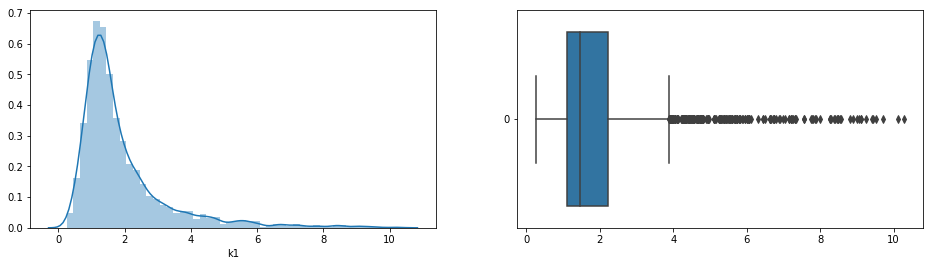

---------------------------------
- k2
Число элементов :  2595
Среднее :  0.20877041339075142
Min :  0.0
Max :  3.2434944239999997
Std :  0.40333418471892013
Median :  0.054770318
25% :  0.017142834000000003
75% :  0.199526935
Межквартильный размах :  0.182384101
Mode :  ModeResult(mode=array([0.]), count=array([9]))
Skew :  3.7691422310384715
kurtosis :  17.398750293394567



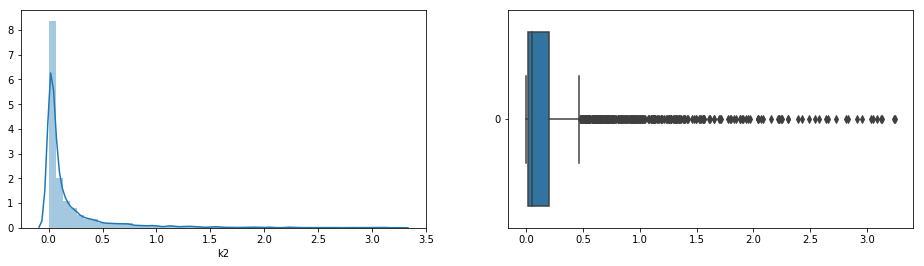

---------------------------------
- k3
Число элементов :  2595
Среднее :  0.7836997488535645
Min :  0.00982686
Max :  5.986988847999999
Std :  0.7772552250453779
Median :  0.535862069
25% :  0.319812634
75% :  0.921503765
Межквартильный размах :  0.6016911309999999
Mode :  ModeResult(mode=array([0.41954053]), count=array([2]))
Skew :  2.656730533096459
kurtosis :  8.98396722061424



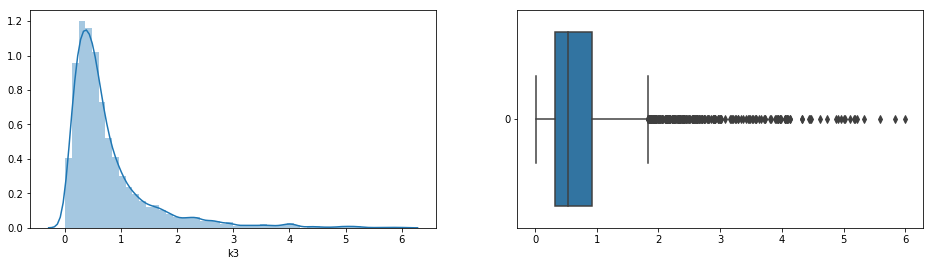

---------------------------------
- k4
Число элементов :  2595
Среднее :  0.05065353385818884
Min :  -3.5299930839999996
Max :  0.9314361790000001
Std :  0.5680985334104949
Median :  0.148020554
25% :  -0.17743218850000003
75% :  0.4160680525
Межквартильный размах :  0.5935002410000001
Mode :  ModeResult(mode=array([-0.15798793]), count=array([2]))
Skew :  -1.8008013324973002
kurtosis :  5.470813919828625



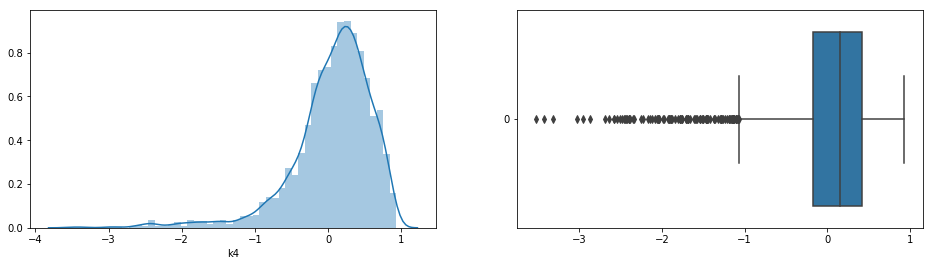

---------------------------------
- k5
Число элементов :  2595
Среднее :  0.34451316016570327
Min :  0.018088755
Max :  1.083701929
Std :  0.19415097564064024
Median :  0.31796543899999996
25% :  0.185454255
75% :  0.47621297949999997
Межквартильный размах :  0.29075872449999995
Mode :  ModeResult(mode=array([0.49931178]), count=array([2]))
Skew :  0.577378354247702
kurtosis :  -0.21342573180425228



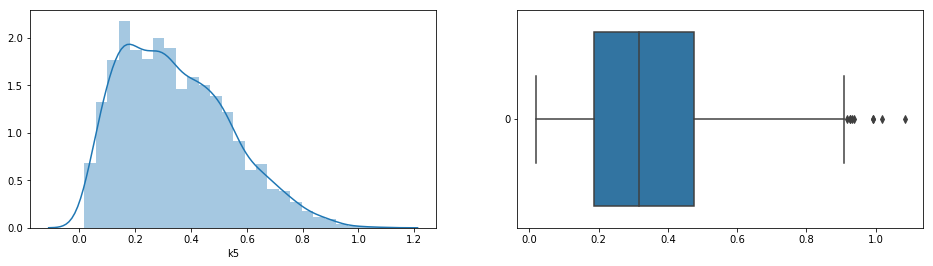

---------------------------------
- k6
Число элементов :  2595
Среднее :  0.23744545266358383
Min :  0.0
Max :  1.0
Std :  0.20989816151166818
Median :  0.186528497
25% :  0.065208744
75% :  0.360977282
Межквартильный размах :  0.295768538
Mode :  ModeResult(mode=array([0.]), count=array([133]))
Skew :  0.982775334301382
kurtosis :  0.3860796988763209



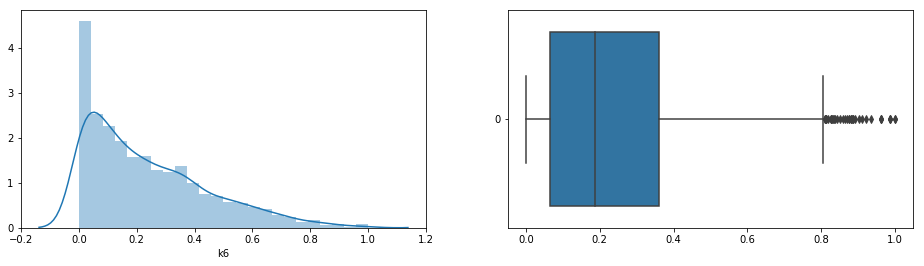

---------------------------------
- k7
Число элементов :  2595
Среднее :  0.17428916496300578
Min :  0.0
Max :  1.0
Std :  0.22267289001539955
Median :  0.076123963
25% :  0.0014765475
75% :  0.268773159
Межквартильный размах :  0.2672966115
Mode :  ModeResult(mode=array([0.]), count=array([598]))
Skew :  1.5038098233147084
kurtosis :  1.633556329922171



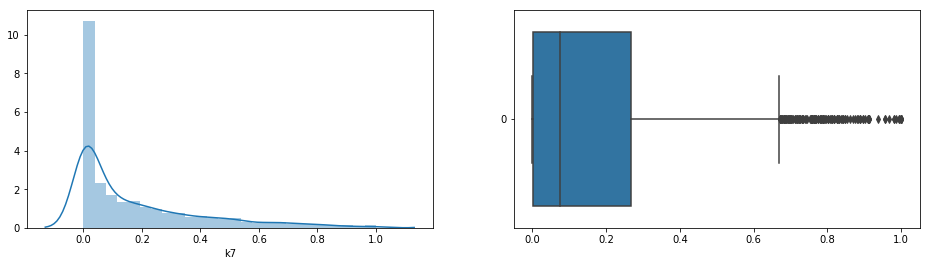

---------------------------------
- k8
Число элементов :  2595
Среднее :  0.6577501152050096
Min :  0.053765869
Max :  0.981911245
Std :  0.19189211957977928
Median :  0.6826695759999999
25% :  0.525884151
75% :  0.8162837445
Межквартильный размах :  0.2903995935
Mode :  ModeResult(mode=array([0.27546119]), count=array([2]))
Skew :  -0.5349297058689774
kurtosis :  -0.3498954309519746



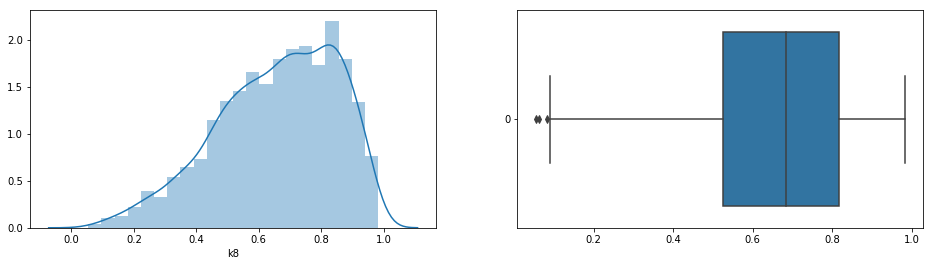

---------------------------------
- k9
Число элементов :  2595
Среднее :  6.600648709089017
Min :  0.059319589000000006
Max :  54.28296296
Std :  6.275273323714773
Median :  4.771665802
25% :  2.6243555484999996
75% :  8.1316382285
Межквартильный размах :  5.50728268
Mode :  ModeResult(mode=array([1.46528827]), count=array([2]))
Skew :  2.5936614927950874
kurtosis :  9.47061407370852



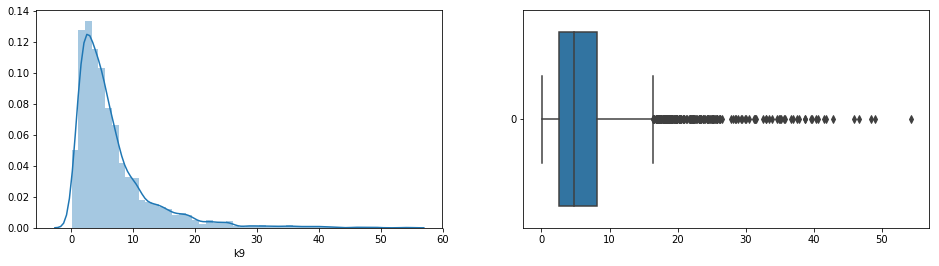

---------------------------------
- k10
Число элементов :  2595
Среднее :  0.8089379933865125
Min :  0.040013564
Max :  5.105631068
Std :  0.693219161753683
Median :  0.618752814
25% :  0.357916408
75% :  0.98266374
Межквартильный размах :  0.624747332
Mode :  ModeResult(mode=array([0.75805354]), count=array([2]))
Skew :  2.3158720851070878
kurtosis :  7.038280705601359



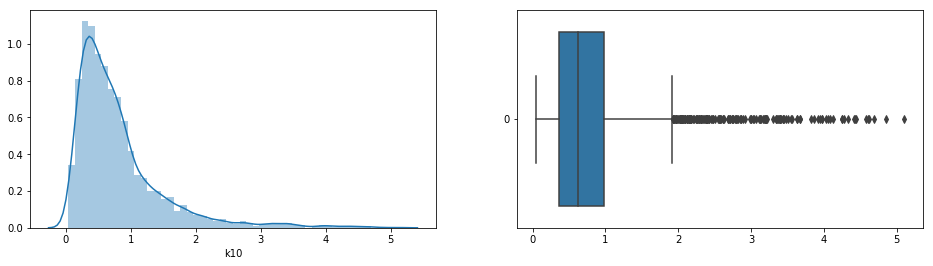

---------------------------------
- k11
Число элементов :  2595
Среднее :  1.3106076637657034
Min :  0.09883829300000001
Max :  4.381205349
Std :  0.37974440690862404
Median :  1.2362104329999999
25% :  1.1112720695
75% :  1.4419023644999998
Межквартильный размах :  0.33063029499999974
Mode :  ModeResult(mode=array([1.17900851]), count=array([2]))
Skew :  1.587793782910781
kurtosis :  6.165561022812753



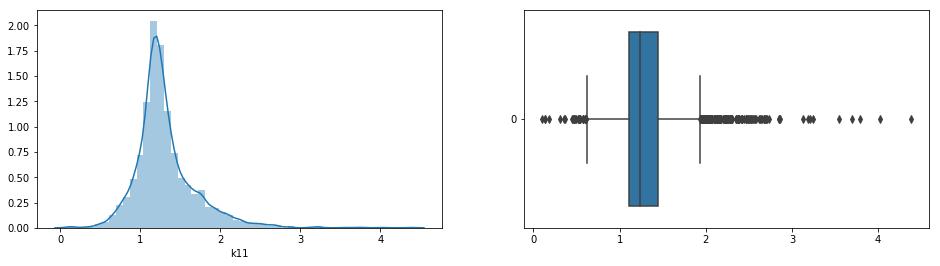

---------------------------------
- k12
Число элементов :  2595
Среднее :  1.3305336947614643
Min :  0.230066701
Max :  4.580604373
Std :  0.4889922313399982
Median :  1.179270323
25% :  1.0707201130000001
75% :  1.3482805635
Межквартильный размах :  0.2775604504999998
Mode :  ModeResult(mode=array([1.]), count=array([2]))
Skew :  2.515349675965632
kurtosis :  8.25549276120887



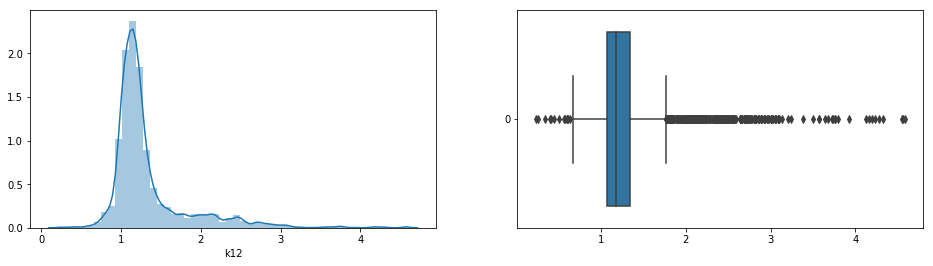

---------------------------------
- k13
Число элементов :  2595
Среднее :  1.2053534796813103
Min :  0.033179704
Max :  4.982852292
Std :  0.6930755241119654
Median :  1.111320927
25% :  0.677032786
75% :  1.5911628434999998
Межквартильный размах :  0.9141300574999998
Mode :  ModeResult(mode=array([2.18481837]), count=array([2]))
Skew :  0.9295681192503117
kurtosis :  1.1366713751565731



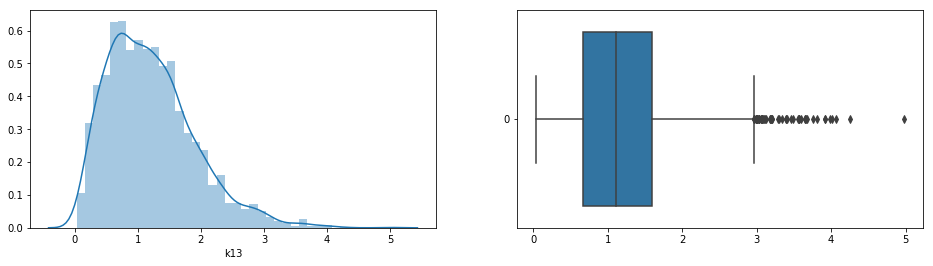

---------------------------------
- k14
Число элементов :  2595
Среднее :  9.796047928417726
Min :  0.220450607
Max :  52.98096371
Std :  7.135853117489315
Median :  8.169933698
25% :  4.6588271905
75% :  13.240551305
Межквартильный размах :  8.5817241145
Mode :  ModeResult(mode=array([6.39397659]), count=array([2]))
Skew :  1.5338879587823289
kurtosis :  3.6041051856118775



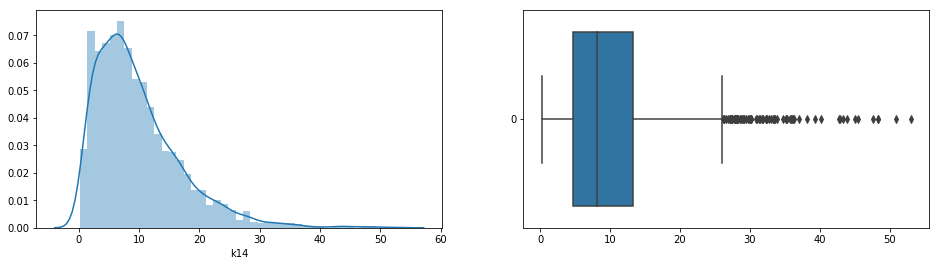

---------------------------------
- k15
Число элементов :  2595
Среднее :  13.043003828307901
Min :  0.347459329
Max :  93.35146444
Std :  10.908692849468393
Median :  9.846368715
25% :  6.025430032000001
75% :  16.421016299999998
Межквартильный размах :  10.395586267999997
Mode :  ModeResult(mode=array([7.54568076]), count=array([2]))
Skew :  2.533906308610572
kurtosis :  9.632985916458669



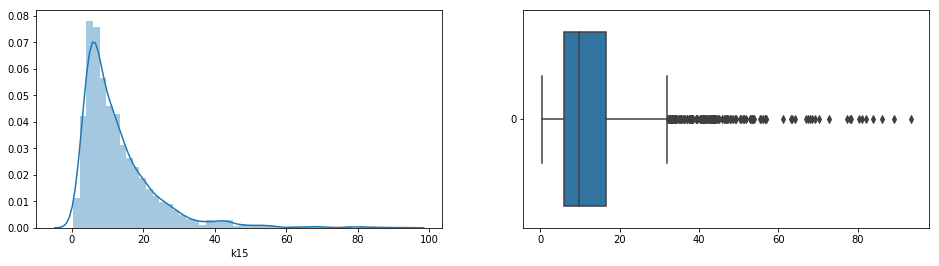

---------------------------------
- k16
Число элементов :  2595
Среднее :  2.0455312961734102
Min :  0.0
Max :  18.96666667
Std :  2.3874107833992593
Median :  1.233379472
25% :  0.7392795670000001
75% :  2.359014097
Межквартильный размах :  1.6197345300000001
Mode :  ModeResult(mode=array([0.48500336]), count=array([2]))
Skew :  3.275134517523357
kurtosis :  13.954091986300892



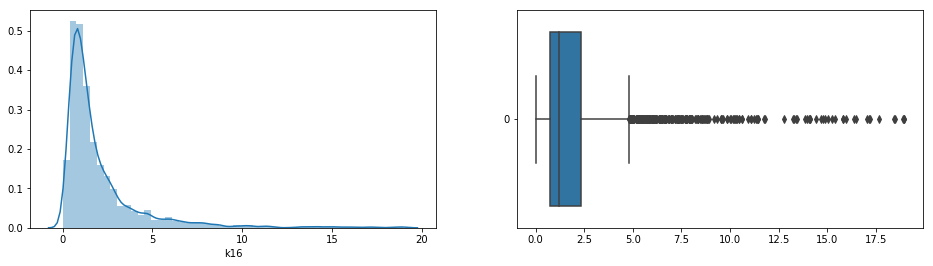

---------------------------------
- k17
Число элементов :  2595
Среднее :  139.4717547894501
Min :  0.447729673
Max :  13063.0
Std :  807.3239257265134
Median :  20.0990943
25% :  10.073921695
75% :  48.40283098
Межквартильный размах :  38.328909284999995
Mode :  ModeResult(mode=array([20.]), count=array([37]))
Skew :  10.659240138624519
kurtosis :  125.63904752045275



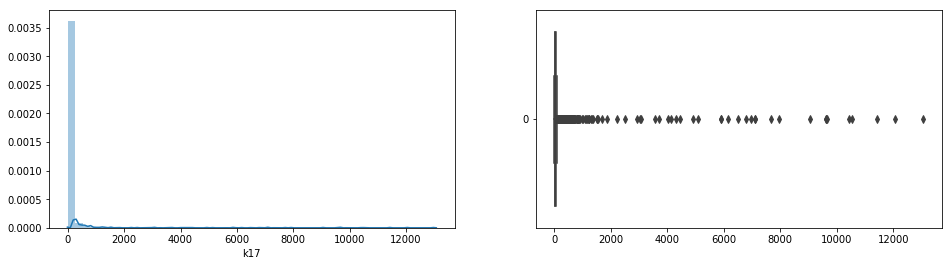

---------------------------------
- k18
Число элементов :  2595
Среднее :  0.05813316703545279
Min :  -0.584878745
Max :  0.529860325
Std :  0.09323010354788709
Median :  0.05946586
25% :  0.024780169500000004
75% :  0.103223852
Межквартильный размах :  0.0784436825
Mode :  ModeResult(mode=array([0.05234404]), count=array([2]))
Skew :  -1.5646406069546854
kurtosis :  9.040083611252772



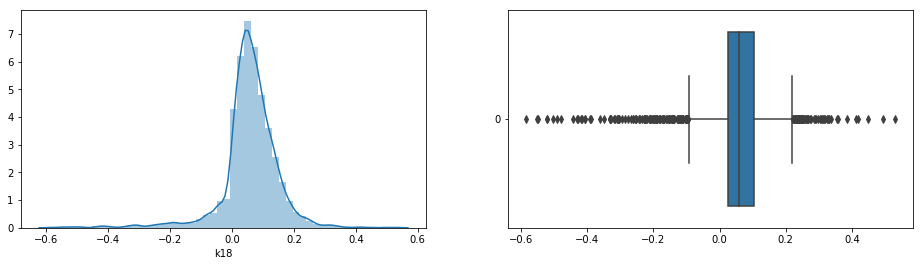

---------------------------------
- k19
Число элементов :  2595
Среднее :  0.07929758303429672
Min :  -0.200097017
Max :  0.635036496
Std :  0.09059525757863734
Median :  0.056122449000000005
25% :  0.018059805999999998
75% :  0.121939712
Межквартильный размах :  0.10387990600000001
Mode :  ModeResult(mode=array([0.]), count=array([4]))
Skew :  1.3218875675143487
kurtosis :  3.0324104950611828



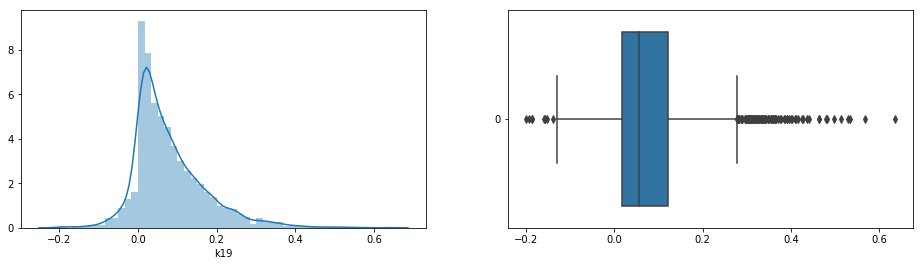

---------------------------------
- k20
Число элементов :  2595
Среднее :  0.0683870828539499
Min :  -0.8063279000000001
Max :  0.83659563
Std :  0.11868351634676824
Median :  0.044362837999999995
25% :  0.0047382565
75% :  0.11889905849999999
Межквартильный размах :  0.11416080199999999
Mode :  ModeResult(mode=array([0.]), count=array([127]))
Skew :  -0.06069798267964844
kurtosis :  7.702474586720356



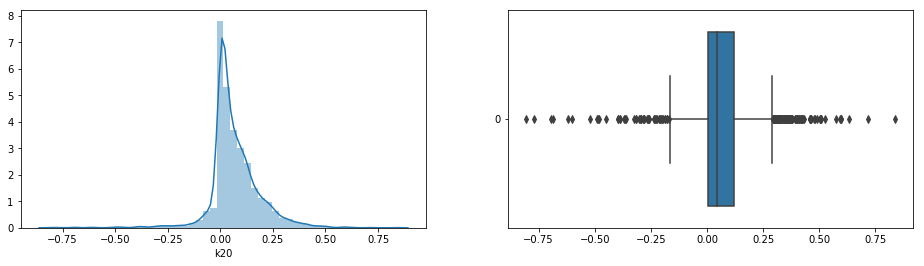

In [11]:
for column_name in data.columns:
    print('---------------------------------')
    print('-', column_name)
    statistic(data[column_name])

### 2.2. Анализ аномальных наблюдений

Тест Хампеля:
Экстремальными наблюдениями считаются наблюдения $x_*$ из выборки $x_1, x_2, ..., x_n$ не попавшие в интервал:
    $[x_{med} - 5.2 * x_{mod}, x_{med} + 5.2 * x_{mod}]$, где $x_{med}$ - медиана выборки $\{x_i\}$, а $x_{mod}$ - медиана выборки абсолютных отклонений от $x_{med}$ : $\{|x_i - x_{med}|\} (i=1, 2, ..., n)$.

Рассмотрим коэффициент 'k1':

In [12]:
def hampeltest(sample, factor=5.2, return_value='len'):
    x_med = np.median(sample)
    x_mod = np.median([abs(i - x_med) for i in sample])
    res_values = [(num, i) for num,i in enumerate(sample) if i < x_med - factor * x_mod or i > x_med + factor * x_mod]
    if return_value == 'len':
        return len(res_values)
    elif return_value == 'percent':
        return round(len(res_values) * 100 / len(sample), 2)
    elif return_value == 'values':
        return [i[1] for i in res_values]
    elif return_value == 'indexes':
        return [i[0] for i in res_values]

In [13]:
def sixsigms(sample, retern_value='len'):
    std = sample.std()
    mean = sample.mean()
    res_values = [i for i in sample if abs(i - mean) > 6* std]
    if retern_value == 'len':
        return len(res_values)
    elif retern_value == 'percent':
        return round(len(res_values) * 100 / len(sample), 2)
    elif retern_value == 'values':
        return res_values
    elif retern_value == 'indexes':
        return [list(sample).index(i) for i in res_values]

Параметр подобрали аналитически:

In [14]:
factors = [5.9, 15, 6, 3, 2.4, 2.9, 7, 5.2, 5, 4.8, 4.8, 7.8, 2.9, 3.4, 4.4, 6.4, 12.4, 3.9, 3.9, 5.3]

In [15]:
skew_influence = []
droped_values = {}
for coeff_name, factor in zip(data.columns, factors):
    print(coeff_name, ':', 'hampeltest: ', hampeltest(data[coeff_name], factor=factor, return_value='percent'))
    print('     sixsigms: ', sixsigms(data[coeff_name], 'percent'))
    print('     skew: ', data[coeff_name].skew())

    skew_influence.append((hampeltest(data[coeff_name], factor=factor, return_value='len'), data[coeff_name].skew()))
    droped_values[coeff_name] = hampeltest(data[coeff_name], factor=factor, return_value='indexes')

k1 : hampeltest:  6.94
     sixsigms:  0.0
     skew:  2.4315406603210317
k2 : hampeltest:  7.09
     sixsigms:  0.54
     skew:  3.771322536381185
k3 : hampeltest:  6.74
     sixsigms:  0.12
     skew:  2.658267350605694
k4 : hampeltest:  7.55
     sixsigms:  0.08
     skew:  -1.8018430275371098
k5 : hampeltest:  7.17
     sixsigms:  0.0
     skew:  0.5777123456530054
k6 : hampeltest:  7.44
     sixsigms:  0.0
     skew:  0.9833438324319163
k7 : hampeltest:  6.78
     sixsigms:  0.0
     skew:  1.5046797200687223
k8 : hampeltest:  0.0
     sixsigms:  0.0
     skew:  -0.5352391423466135
k9 : hampeltest:  6.59
     sixsigms:  0.19
     skew:  2.5951618272646555
k10 : hampeltest:  6.05
     sixsigms:  0.04
     skew:  2.3172117289758227
k11 : hampeltest:  6.32
     sixsigms:  0.15
     skew:  1.5887122611893396
k12 : hampeltest:  7.67
     sixsigms:  0.19
     skew:  2.5168047100293873
k13 : hampeltest:  5.55
     sixsigms:  0.0
     skew:  0.9301058390317852
k14 : hampeltest:  6.55
    

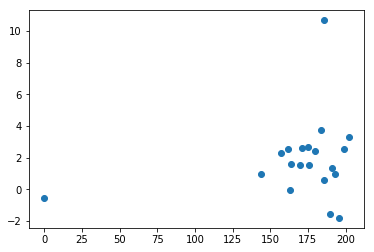

In [16]:
plt.scatter([i[0] for i in skew_influence], [i[1] for i in skew_influence])

Удалим ненужные значения??

In [17]:
update_data = {}
for key in droped_values:
    update_data[key] = data[key].drop(droped_values[key])

In [18]:
for coeff_name in data.columns:
    print(data[coeff_name].size - update_data[coeff_name].size)

180
184
175
196
186
193
176
0
171
157
164
199
144
170
162
202
186
190
191
163


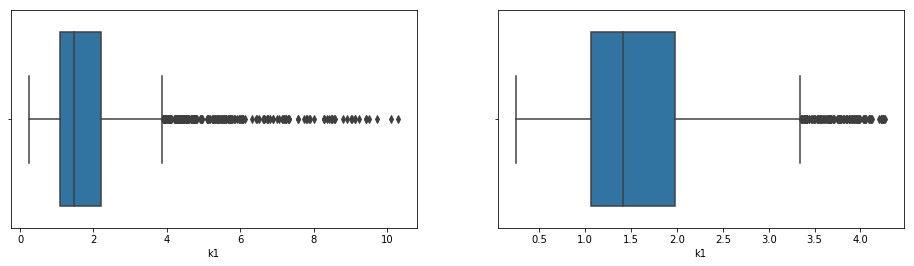

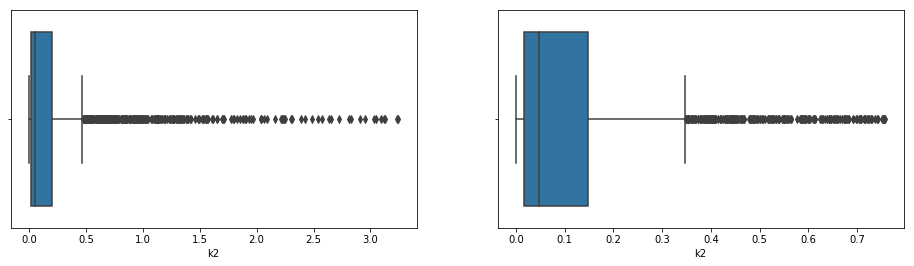

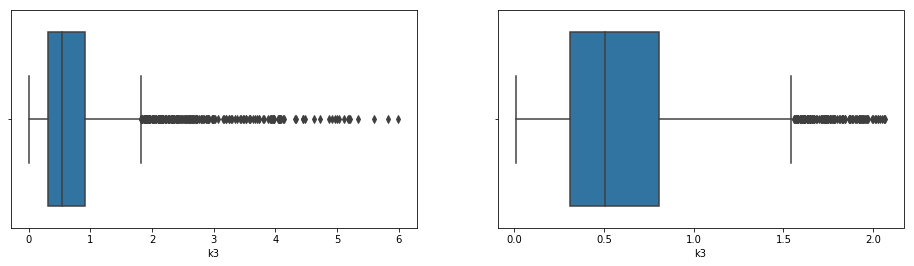

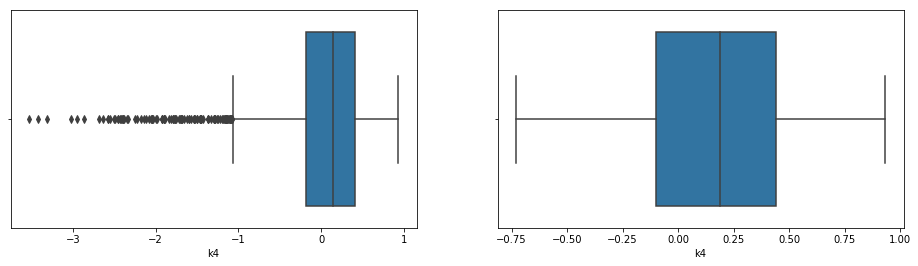

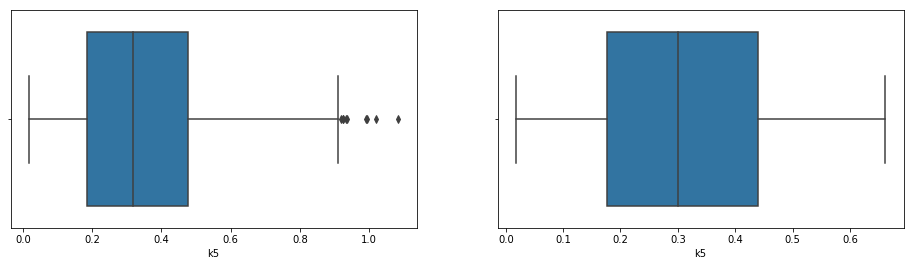

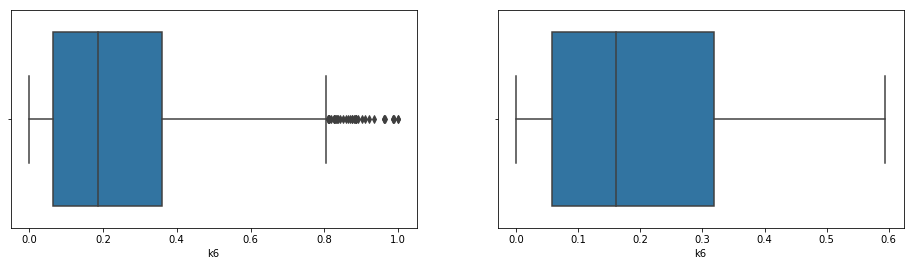

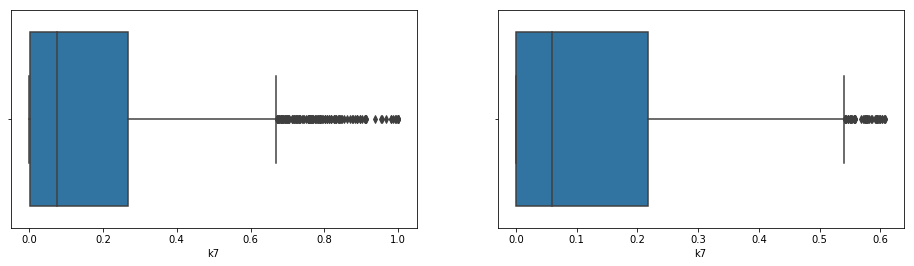

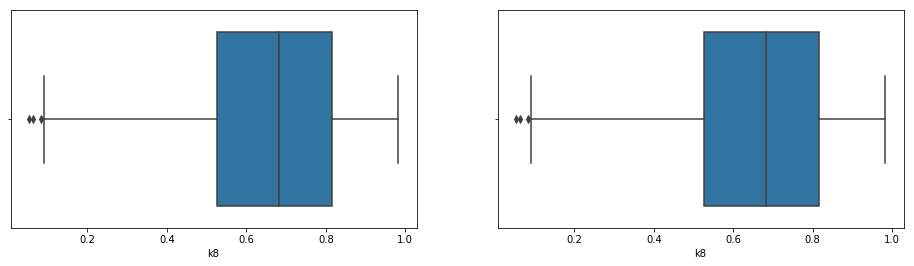

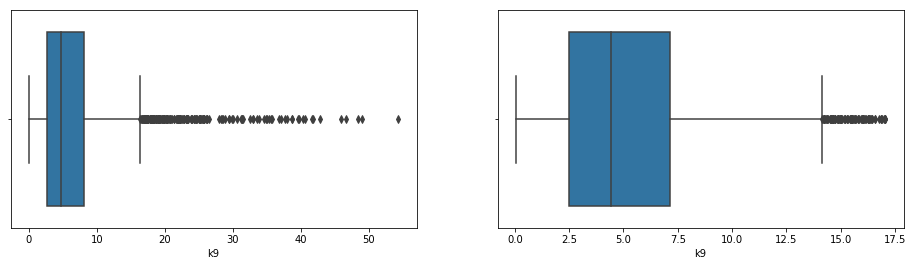

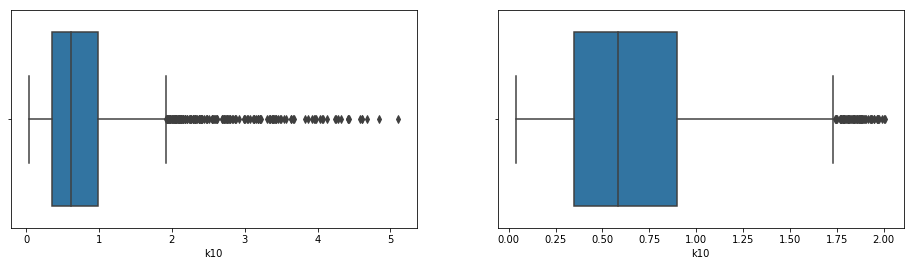

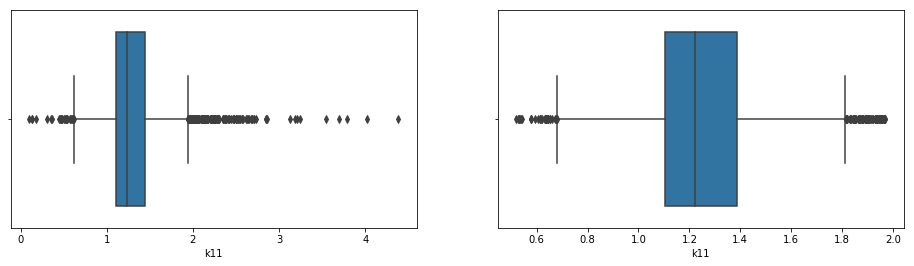

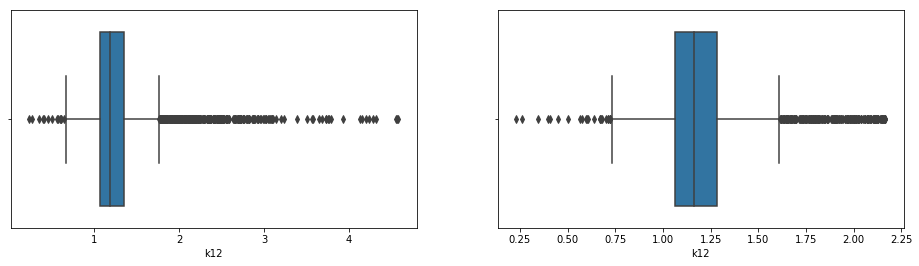

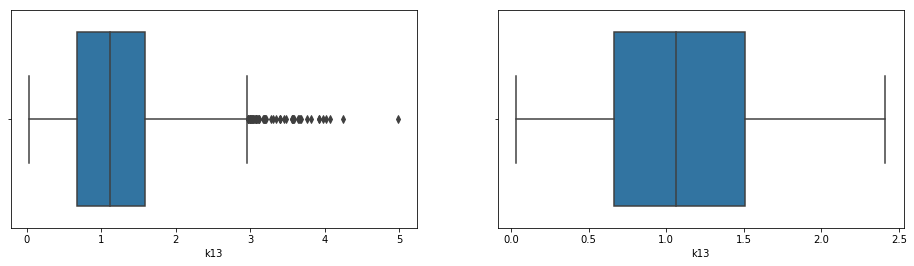

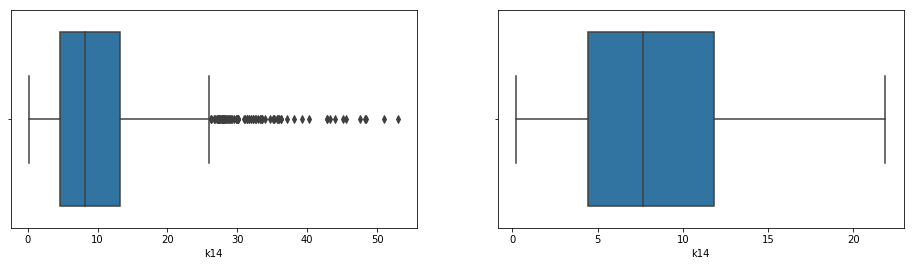

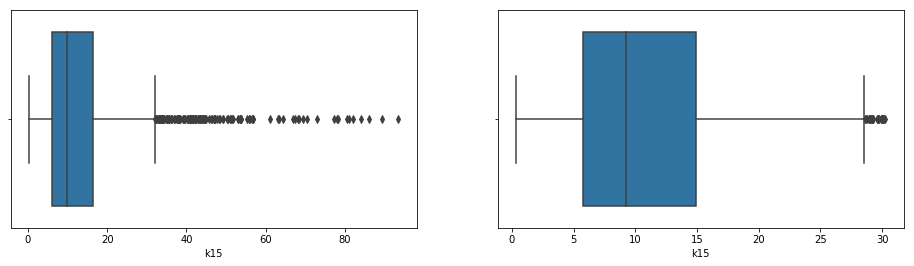

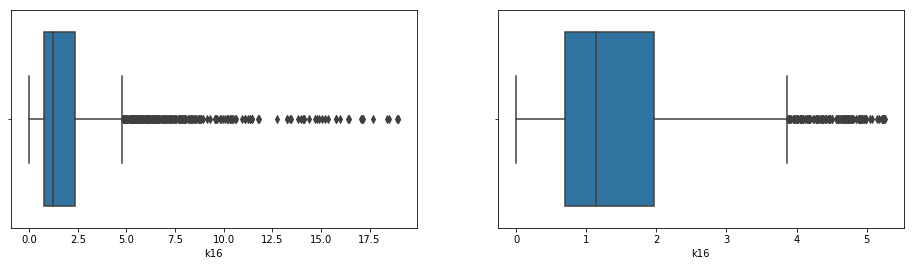

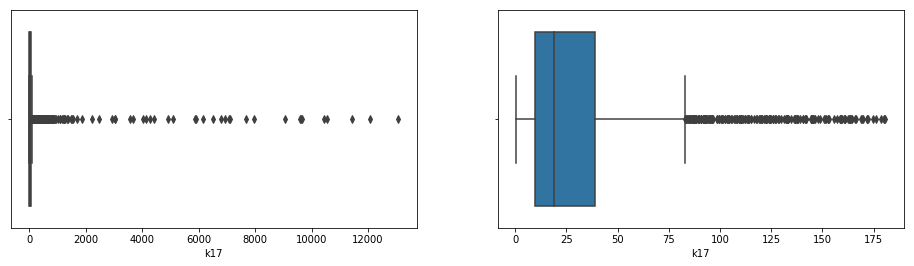

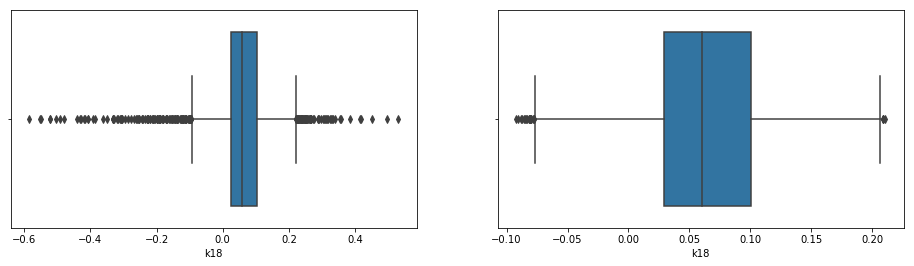

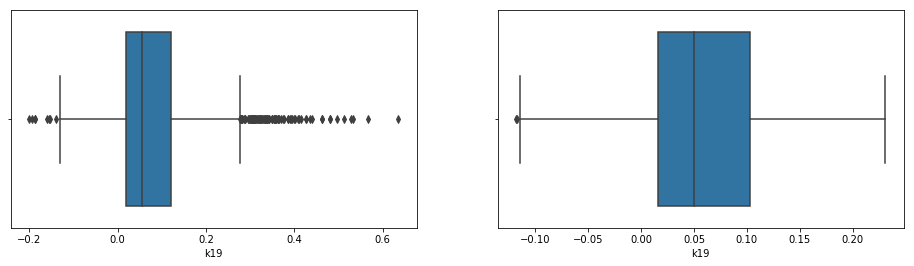

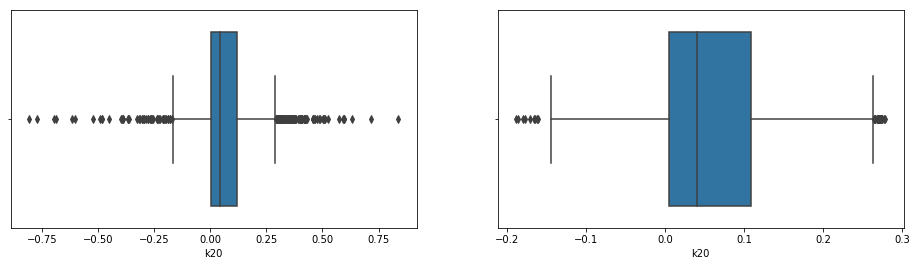

In [19]:
for coeff_name in data.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    sns.boxplot(data[coeff_name], ax=ax1)
    sns.boxplot(update_data[coeff_name], ax=ax2)
    plt.show()

Произведем цензурирование данных:

Пороговые значения для коэффициентов K1-K19, используемые при цензурировании

In [20]:
censoring_values = {'k1': (1, 5),
                    'k2': (0.05, 0.8),
                    'k4': (0.15, 1),
                    'k5': (0, 1),
                    'k6': (0, 0.3),
                    'k7': (0, 0.3),
                    'k9': (0.8, 5),
                    'k10': (0.3, 2),
                    'k11': (1, 10),
                    'k13': (0.5, 3),
                    'k14': (1, 10),
                    'k15': (0, 5),
                    'k18': (0, 30),
                    'k19': (0, 20),}

In [21]:
#Есть ли смысл в этих значениях ???
censoring_values['k11'], (update_data['k11'].min(), update_data['k11'].max())

((1, 10), (0.519181586, 1.968864774))

In [22]:
censoring_data = update_data.copy()

In [23]:
def change_value(x):
    if x <= mx and x >= mn:
        return x
    elif x < mn:
        return mn
    else:
        return mx
    
for coeff_name in censoring_values:
    mn = censoring_values[coeff_name][0]
    mx = censoring_values[coeff_name][1]
    censoring_data[coeff_name] = censoring_data[coeff_name].map(change_value)

(1, 5)


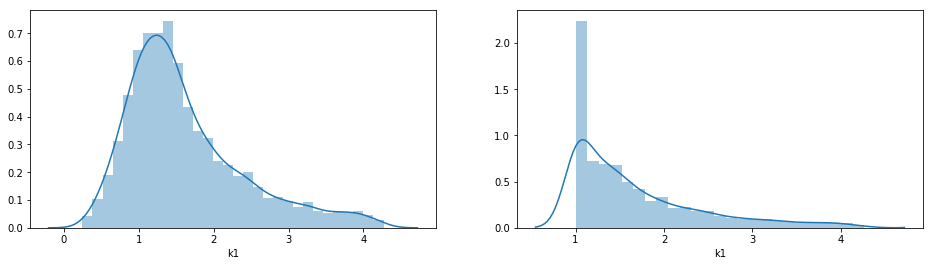

(0.05, 0.8)


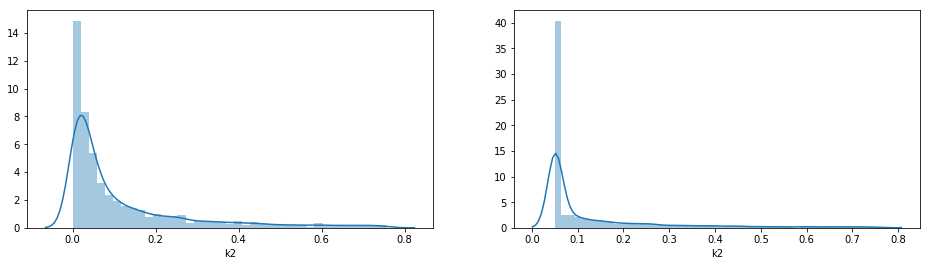

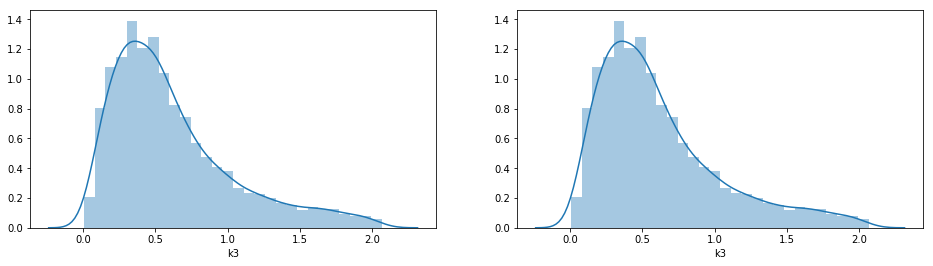

(0.15, 1)


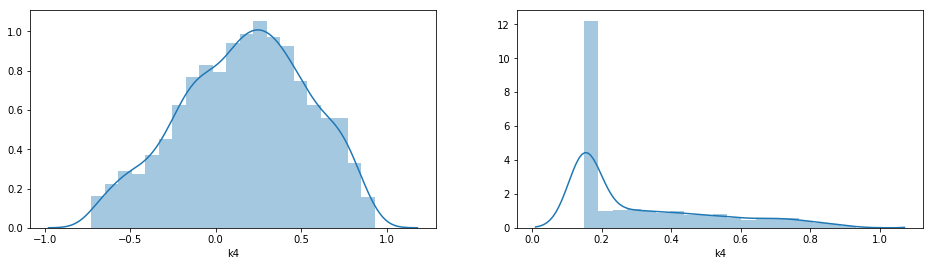

(0, 1)


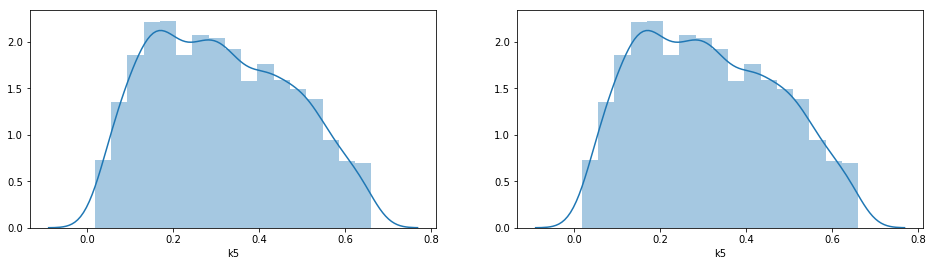

(0, 0.3)


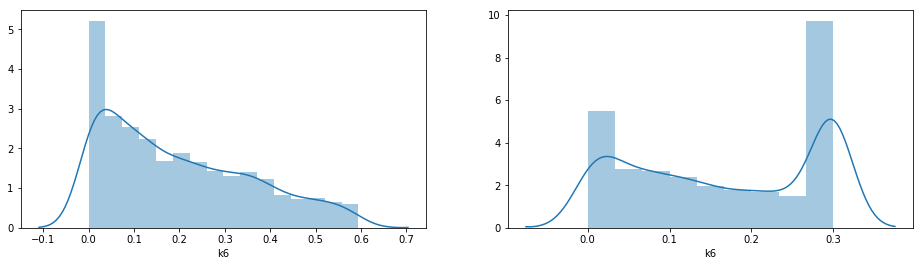

(0, 0.3)


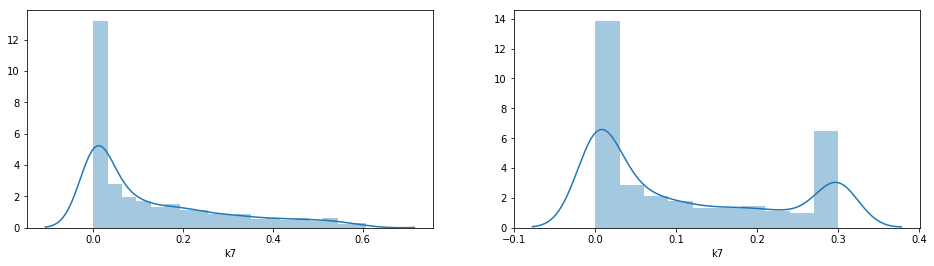

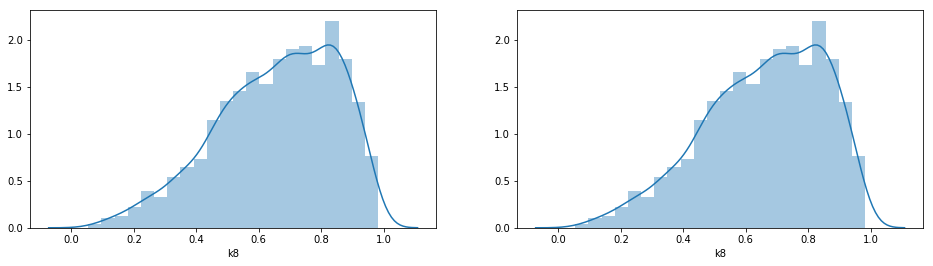

(0.8, 5)


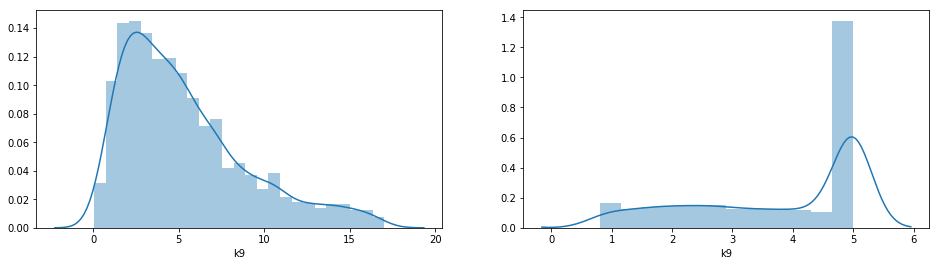

(0.3, 2)


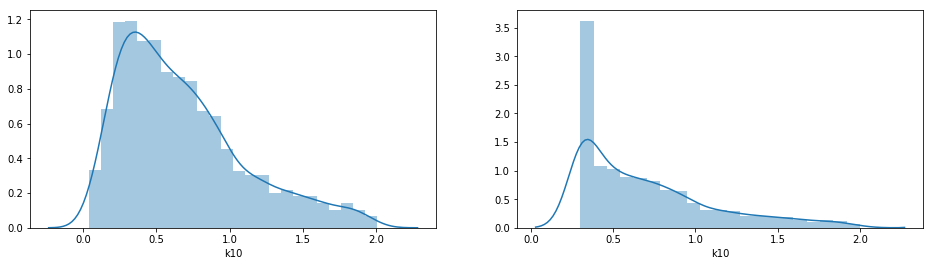

(1, 10)


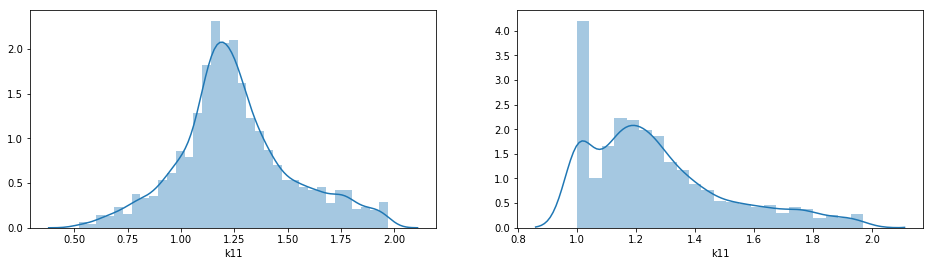

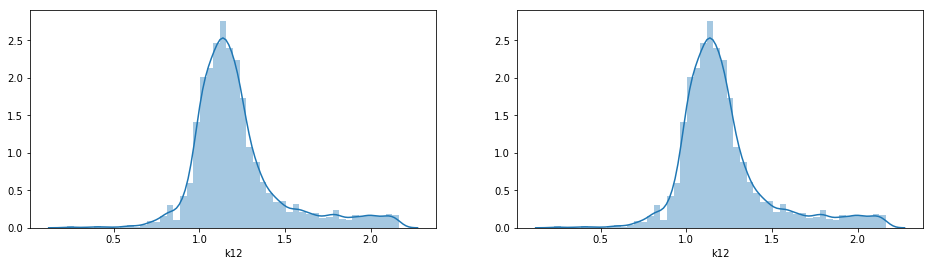

(0.5, 3)


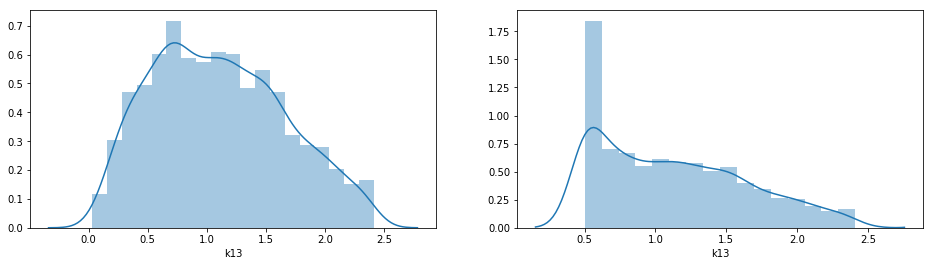

(1, 10)


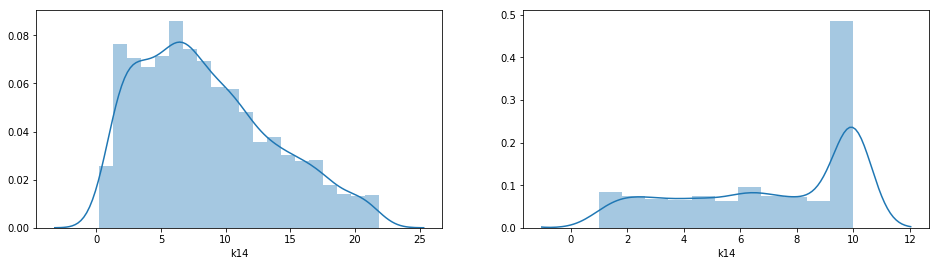

(0, 5)


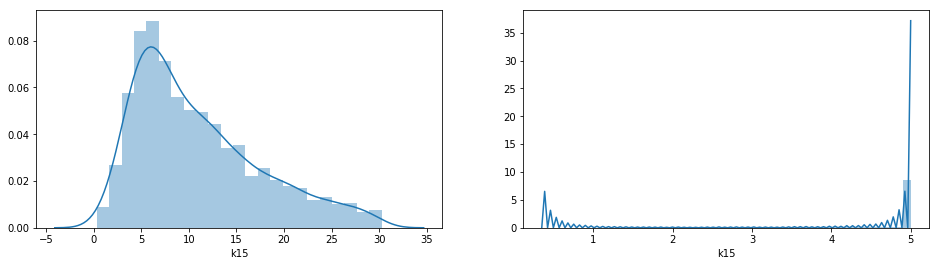

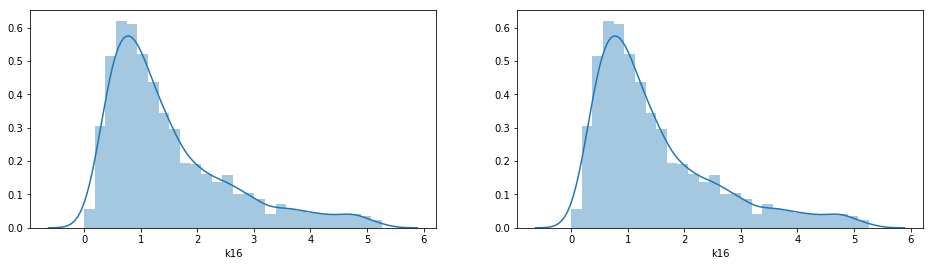

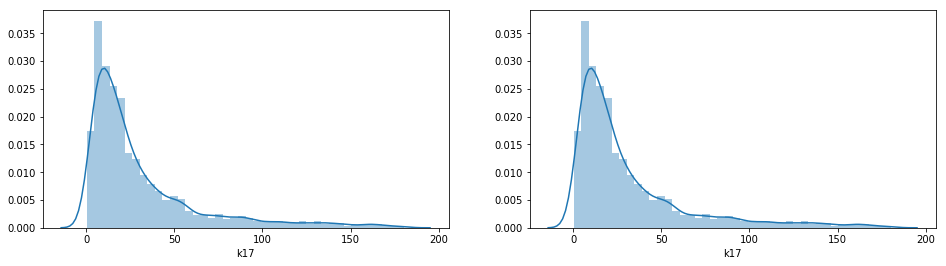

(0, 30)


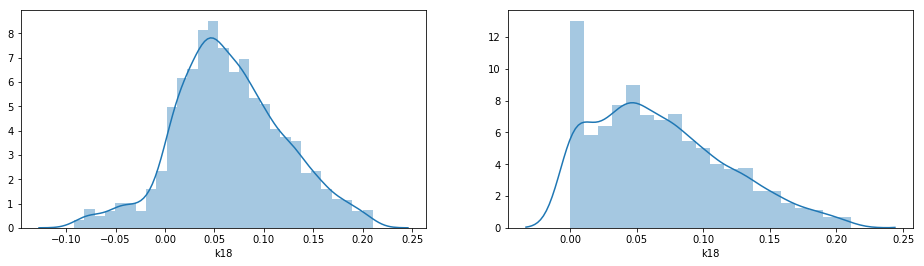

(0, 20)


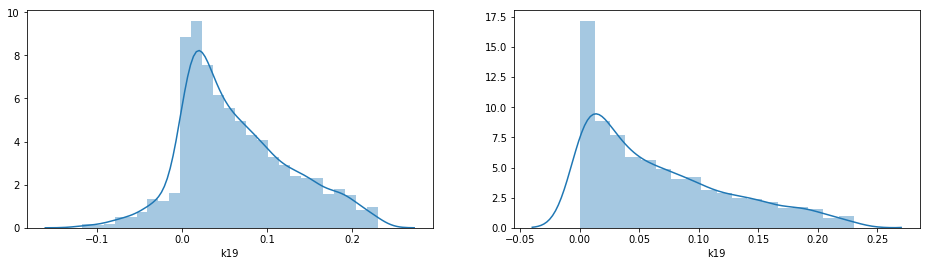

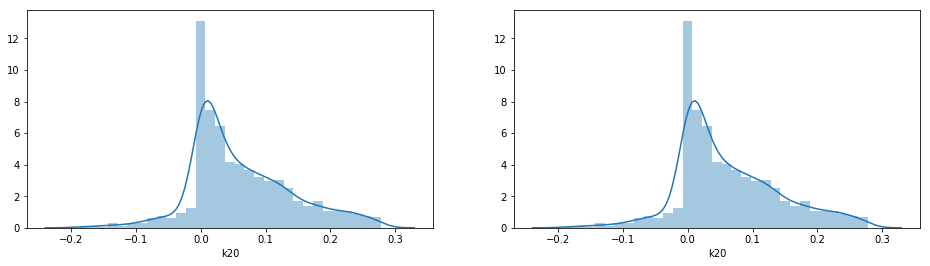

In [24]:
for coeff_name in data.columns:
    if coeff_name in censoring_values:
        print(censoring_values[coeff_name])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(update_data[coeff_name], ax=ax1)
    sns.distplot(censoring_data[coeff_name], ax=ax2)
    plt.show()

Произведем нормировку данных:

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
# Будем работать с выбросами, с кем не бывает.
# df = pd.DataFrame(update_data, index=data.index, columns=data.columns)
# normalized_data = pd.DataFrame(scaler.transform(df),
#                                index=data.index, columns=data.columns)

normalized_data = pd.DataFrame(scaler.transform(data),
                               index=data.index, columns=data.columns)

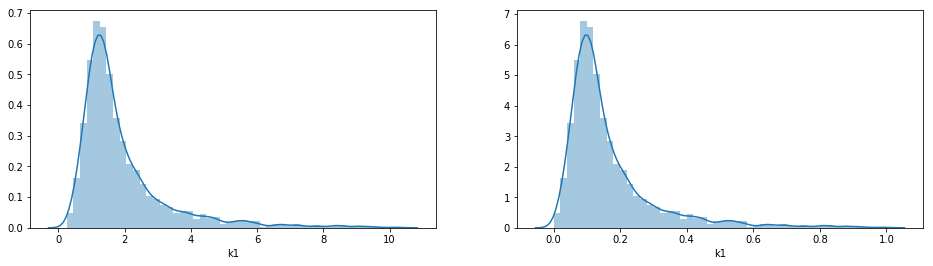

In [28]:
for coeff_name in data.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(data[coeff_name], ax=ax1)
    sns.distplot(normalized_data[coeff_name], ax=ax2)
    plt.show()
    break

### 3. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ДАННЫХ

Матрица корреляций:

In [29]:
corr_matrix = data.corr()
corr_matrix

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20
k1,1.000000,0.695310,0.869072,0.515001,-0.447365,-0.111084,-0.259822,0.440232,0.526164,0.082592,0.014225,0.052974,0.070045,0.501442,0.025206,-0.297974,-0.015506,0.281106,0.346460,0.225090
k2,0.695310,1.000000,0.777397,0.356743,-0.329258,-0.125409,-0.222623,0.327930,0.370132,0.065589,0.063835,0.086961,0.053335,0.329222,0.093982,-0.145828,-0.008110,0.252146,0.335112,0.226031
k3,0.869072,0.777397,1.000000,0.438736,-0.371578,-0.105612,-0.231249,0.366245,0.455464,0.102985,0.039669,0.076653,0.099996,0.441449,-0.122816,-0.353606,0.017271,0.282762,0.363869,0.252657
k4,0.515001,0.356743,0.438736,1.000000,-0.556285,-0.084264,-0.262685,0.555175,0.297456,0.224224,0.015918,-0.001958,0.270755,0.338583,0.055591,-0.298297,-0.029979,0.420012,0.435224,0.370363
k5,-0.447365,-0.329258,-0.371578,-0.556285,1.000000,0.029716,0.155801,-0.996175,-0.586956,0.447275,0.019453,0.021120,0.041571,-0.299175,-0.266074,0.030822,-0.062502,-0.177568,-0.230918,-0.109526
k6,-0.111084,-0.125409,-0.105612,-0.084264,0.029716,1.000000,0.385819,-0.024305,-0.020821,-0.078079,-0.125640,-0.149861,-0.130469,-0.161685,-0.114171,0.068517,-0.000029,-0.235896,-0.215260,-0.217524
k7,-0.259822,-0.222623,-0.231249,-0.262685,0.155801,0.385819,1.000000,-0.150230,-0.135380,-0.077465,-0.127239,-0.124646,-0.248424,-0.329575,-0.172125,0.149073,0.024142,-0.315570,-0.321296,-0.293806
k8,0.440232,0.327930,0.366245,0.555175,-0.996175,-0.024305,-0.150230,1.000000,0.589244,-0.455618,-0.023420,-0.023385,-0.047457,0.295873,0.265313,-0.029271,0.060811,0.174215,0.226457,0.105977
k9,0.526164,0.370132,0.455464,0.297456,-0.586956,-0.020821,-0.135380,0.589244,1.000000,-0.331141,-0.035241,-0.014133,-0.255192,0.524953,0.072403,-0.244352,0.020884,0.096590,-0.009332,-0.048141
k10,0.082592,0.065589,0.102985,0.224224,0.447275,-0.078079,-0.077465,-0.455618,-0.331141,1.000000,0.057798,0.061481,0.290031,-0.019423,-0.228061,-0.165518,-0.041610,0.221654,0.286903,0.355200


In [30]:
eps = 0.2
droped_params = set()

for from_i, i  in enumerate(data.columns):
    for j in data.columns[from_i:]:
        if i != j and 1 - abs(corr_matrix[i][j]) <= eps:
            droped_params.add(j)
            print(i, j, corr_matrix[i][j])
print('We will droped this params: ', droped_params)

k1 k3 0.8690720015802463
k5 k8 -0.9961754184670777
k19 k20 0.870161796595925
We will droped this params:  {'k20', 'k3', 'k8'}


\# В примере нету 3, 8, 12, 16, 17, 20.

Исключим сильно коррелируемые коэффициенты.

In [31]:
data.drop(droped_params, axis=1, inplace=True)

In [32]:
normalized_data.drop(droped_params, axis=1, inplace=True)

In [33]:
data.head()

,k1,k2,k4,k5,k6,k7,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19
0,0.942380,0.060563,-0.161531,0.202055,0.165019,0.399033,5.426569,0.209235,1.115922,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049
1,1.980494,0.274382,0.624425,0.089377,0.220648,0.000000,14.041958,0.215083,1.259382,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740
2,0.374160,0.001494,-1.504990,0.235739,0.508929,0.888889,5.017007,0.096737,0.774586,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563
3,7.859079,0.831978,0.875862,0.059439,0.030030,0.011111,16.244444,0.876663,1.223284,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295
4,1.779376,0.005596,0.527853,0.135491,0.886686,0.489796,10.558673,0.313389,0.874381,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726


### 4. ФАКТОРНЫЙ АНАЛИЗ. МЕТОД ГЛАВНЫХ КОМПОНЕНТ

In [34]:
X = normalized_data.copy(deep=True)

In [35]:
corr_matrix = normalized_data.corr()
corr_matrix

,k1,k2,k4,k5,k6,k7,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19
k1,1.000000,0.695310,0.515001,-0.447365,-0.111084,-0.259822,0.526164,0.082592,0.014225,0.052974,0.070045,0.501442,0.025206,-0.297974,-0.015506,0.281106,0.346460
k2,0.695310,1.000000,0.356743,-0.329258,-0.125409,-0.222623,0.370132,0.065589,0.063835,0.086961,0.053335,0.329222,0.093982,-0.145828,-0.008110,0.252146,0.335112
k4,0.515001,0.356743,1.000000,-0.556285,-0.084264,-0.262685,0.297456,0.224224,0.015918,-0.001958,0.270755,0.338583,0.055591,-0.298297,-0.029979,0.420012,0.435224
k5,-0.447365,-0.329258,-0.556285,1.000000,0.029716,0.155801,-0.586956,0.447275,0.019453,0.021120,0.041571,-0.299175,-0.266074,0.030822,-0.062502,-0.177568,-0.230918
k6,-0.111084,-0.125409,-0.084264,0.029716,1.000000,0.385819,-0.020821,-0.078079,-0.125640,-0.149861,-0.130469,-0.161685,-0.114171,0.068517,-0.000029,-0.235896,-0.215260
k7,-0.259822,-0.222623,-0.262685,0.155801,0.385819,1.000000,-0.135380,-0.077465,-0.127239,-0.124646,-0.248424,-0.329575,-0.172125,0.149073,0.024142,-0.315570,-0.321296
k9,0.526164,0.370132,0.297456,-0.586956,-0.020821,-0.135380,1.000000,-0.331141,-0.035241,-0.014133,-0.255192,0.524953,0.072403,-0.244352,0.020884,0.096590,-0.009332
k10,0.082592,0.065589,0.224224,0.447275,-0.078079,-0.077465,-0.331141,1.000000,0.057798,0.061481,0.290031,-0.019423,-0.228061,-0.165518,-0.041610,0.221654,0.286903
k11,0.014225,0.063835,0.015918,0.019453,-0.125640,-0.127239,-0.035241,0.057798,1.000000,0.536345,0.074061,0.009371,0.012623,-0.056096,0.037561,0.307775,0.275508
k12,0.052974,0.086961,-0.001958,0.021120,-0.149861,-0.124646,-0.014133,0.061481,0.536345,1.000000,-0.025399,-0.023245,-0.069109,-0.089561,0.008124,0.308014,0.288671


In [36]:
import rpy2.robjects as robjects
from rpy2.robjects import r
from rpy2.robjects.numpy2ri import numpy2ri
from rpy2.robjects.packages import importr

In [37]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

Критерий сферичности Бартлетта:

In [38]:
calculate_bartlett_sphericity(normalized_data)

(19832.76938761454, 0.0)

Нулевая гипотеза о том, что корреляционная матрица является единичной, отклоняется критерием сферичности Бартлетта. Приближенное значение статистики равно ~19832, она является значимой на уровне 0,05.

Статистика Кайзера − Мейера − Олкина (КМО):

In [39]:
calculate_kmo(X)

(          KMO
 k1   0.804793
 k2   0.782798
 k4   0.669293
 k5   0.577444
 k6   0.760123
 k7   0.869207
 k9   0.631102
 k10  0.486956
 k11  0.682173
 k12  0.655970
 k13  0.515309
 k14  0.666943
 k15  0.471631
 k16  0.583325
 k17  0.285204
 k18  0.777631
 k19  0.745442, 0.663490926354832)

In [40]:
# Taking the variable from Python to R
r_data = numpy2ri(X.values)

# Creating this variable in R (from python)
r.assign("data", r_data)

# Calling libraries in R 
r('library("psych")')

# Calling a function in R (from python)
r("res <- KMO(data)")

# Retrieving information from R to Python
r_result = r("res")

# Printing the output in python
print(r_result)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.66
MSA for each item = 
 [1] 0.80 0.78 0.67 0.58 0.76 0.87 0.63 0.49 0.68 0.66 0.52 0.67 0.47 0.58 0.29
[16] 0.78 0.75



Значение статистики КМО, равное 0,66, свидетельствует о приемлемом качестве выборки для применения факторного анализа. Пороговым в данном случае обычно считается значение 0,6. Следовательно, использование факторного анализа применительно к данной выборке является целесообразным.

In [41]:
from factor_analyzer import FactorAnalyzer

In [42]:
# для отображения двух dataframe'ов
from IPython.display import display

In [43]:
fa = FactorAnalyzer()

fa.analyze(X, 5, rotation=None)
fa_before = fa.loadings.copy()
# собственные значения - SS Loadings
# % объясненной дисперсии - Proportion Var
# Кумулятивный % объясненной дисперсии - Cumulative Var
fa_factor_var_before = fa.get_factor_variance().copy()

In [44]:
from factor_analyzer import Rotator
rotator = Rotator()
rotate_mtx = rotator.rotate(X, 'quartimax')
X_rotate = rotate_mtx[0]

In [45]:
fa = FactorAnalyzer()

fa.analyze(X_rotate, 5, rotation=None)
fa_after = fa.loadings.copy()
fa_factor_var_after = fa.get_factor_variance().copy()

In [46]:
print('Факторные нагрузки до вращения')
display(fa_before.applymap(lambda x: 0 if x < 0.4 else x))
print('Факторные нагрузки после вращения')
display(fa_after.applymap(lambda x: 0 if x < 0.4 else x))

Факторные нагрузки до вращения


,Factor1,Factor2,Factor3,Factor4,Factor5
k1,0.723462,0.000000,0.000000,0.000000,0
k2,0.569035,0.000000,0.000000,0.000000,0
k4,0.671139,0.000000,0.000000,0.000000,0
k5,0.000000,0.543359,0.000000,0.000000,0
k6,0.000000,0.000000,0.000000,0.000000,0
k7,0.000000,0.000000,0.000000,0.000000,0
k9,0.506433,0.000000,0.000000,0.000000,0
k10,0.000000,0.582768,0.000000,0.000000,0
k11,0.000000,0.000000,0.000000,0.512516,0
k12,0.000000,0.000000,0.000000,0.598936,0


Факторные нагрузки после вращения


,Factor1,Factor2,Factor3,Factor4,Factor5
k1,0.000000,0.000000,0.000000,0.000000,0.00000
k2,0.468227,0.000000,0.000000,0.000000,0.00000
k4,0.720877,0.000000,0.000000,0.000000,0.00000
k5,0.000000,0.531630,0.000000,0.000000,0.00000
k6,0.000000,0.000000,0.000000,0.000000,0.00000
k7,0.000000,0.000000,0.000000,0.000000,0.00000
k9,0.000000,0.000000,0.000000,0.000000,0.00000
k10,0.000000,0.625380,0.000000,0.000000,0.00000
k11,0.000000,0.000000,0.000000,0.000000,0.00000
k12,0.000000,0.000000,0.000000,0.000000,0.43931


In [47]:
# собственные значения - SS Loadings
# % объясненной дисперсии - Proportion Var
# Кумулятивный % объясненной дисперсии - Cumulative Var
print('Собственные значения и объясненная дисперсия')
print('До вращения:')
display(fa_factor_var_before)
print('После вращения:')
display(fa_factor_var_after)

Собственные значения и объясненная дисперсия
До вращения:


,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,3.885953,2.050960,1.331106,1.159994,0.710826
Proportion Var,0.228585,0.120645,0.078300,0.068235,0.041813
Cumulative Var,0.228585,0.349230,0.427531,0.495765,0.537579


После вращения:


,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.113809,1.970308,1.357336,1.105080,0.771629
Proportion Var,0.124342,0.115900,0.079843,0.065005,0.045390
Cumulative Var,0.124342,0.240242,0.320086,0.385090,0.430480


Выведем соответствующие коэффициенты главных компонент

In [48]:
fa.get_communalities().values

array([[0.10443723],
       [0.46828088],
       [0.7681342 ],
       [0.67500727],
       [0.01588496],
       [0.09643761],
       [0.79285257],
       [0.58837674],
       [0.10287193],
       [0.33800012],
       [0.66350019],
       [0.84421961],
       [0.65563817],
       [0.52799323],
       [0.01476747],
       [0.23203627],
       [0.42972465]])

Посчитаем интегральный показатель кредитоспособности:

In [49]:
res = []
for i in range(X.shape[0]):
    res.append(X.ix[i].values.dot(fa.get_communalities().values)[0])

In [50]:
# integral indicator of creditworthiness - iic
iic = pd.Series(res)

Получим интегральные показатель кредитоспособности:

In [51]:
iic[:10]

0    1.414168
1    1.796704
2    1.142002
3    3.284860
4    1.546378
5    2.147619
6    1.664419
7    2.522541
8    1.983982
9    1.738774
dtype: float64

In [52]:
iic.min(), iic.max()

(1.08633227866855, 3.5457856744139384)

Метод главных компонент:

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA()
dataPCA = pca.fit_transform(X)

# pca.fit(normalized_data)

print('Доля объясненной дисперсии по каждому компоненту:\n')
for var, component_idx in zip(pca.explained_variance_ratio_, range(1, len(normalized_data.columns) + 1)):
    print('%s - %.5f' % (component_idx, var))

# print('Направление основных компонент:')
# for components, component_idx in zip(pca.components_, range(1, len(data.columns) + 1)):
#     print(component_idx, components)

Доля объясненной дисперсии по каждому компоненту:

1 - 0.28256
2 - 0.16800
3 - 0.11250
4 - 0.08583
5 - 0.07535
6 - 0.05949
7 - 0.05141
8 - 0.04734
9 - 0.02512
10 - 0.01722
11 - 0.01475
12 - 0.01342
13 - 0.01300
14 - 0.01161
15 - 0.00964
16 - 0.00641
17 - 0.00635


Факторные нагрузки. Теперь проведем анализ главных компонент и рассмотрим решение с двумя факторами. Для этого рассмотрим корреляции между переменными и двумя факторами (или "новыми" переменными), как они были выделены по умолчанию; эти корреляции называются факторными нагрузками.

In [55]:
pca = PCA(n_components=5)
dataPCA = pca.fit_transform(dataPCA)
# print('Доля объясненной дисперсии по каждому компоненту:\n')
# for var, component_idx in zip(pca.explained_variance_ratio_, range(1, len(data.columns) + 1)):
#     print('%s - %.5f' % (component_idx, var))

In [56]:
pca = PCA(n_components=5)
dataPCA = pca.fit_transform(dataPCA)
print('Доля объясненной дисперсии по каждому компоненту:\n')
for var, component_idx in zip(pca.explained_variance_ratio_, range(1, len(data.columns) + 1)):
    print('%s - %.5f' % (component_idx, var))

Доля объясненной дисперсии по каждому компоненту:

1 - 0.39015
2 - 0.23197
3 - 0.15533
4 - 0.11851
5 - 0.10404


In [57]:
corr_df = pd.DataFrame(np.zeros((len(normalized_data.columns), dataPCA.shape[1])), 
                       columns=[str(i) for i in range(1, dataPCA.shape[1]+1)], index=normalized_data.columns)
for coeff_name in normalized_data.columns:
    for j in range(5):
        corr = np.corrcoef(normalized_data[coeff_name], [i[j] for i in dataPCA])[0][1]
        if abs(corr) <= 0.4:
            corr_df[str(j+1)][coeff_name] = 0
        else:
            corr_df[str(j+1)][coeff_name] = round(corr, 3)
corr_df

,1,2,3,4,5
k1,-0.641,0.405,0.000,0.000,0.000
k2,-0.535,0.000,0.000,0.000,0.000
k4,-0.606,0.000,0.000,0.000,0.000
k5,0.519,-0.717,0.000,0.000,0.000
k6,0.536,0.534,0.442,-0.449,0.000
k7,0.760,0.000,0.000,0.455,0.000
k9,-0.439,0.618,0.000,0.000,0.000
k10,0.000,-0.481,0.647,0.000,0.000
k11,0.000,0.000,0.000,0.000,0.000
k12,0.000,0.000,0.000,0.000,0.000


### 5. КЛАСТЕРНЫЙ АНАЛИЗ ДАННЫХ

In [58]:
n_clusters = 4
quantils = []
step = 1 / n_clusters
for i in range(1, n_clusters + 1):
    quantils.append(iic.quantile(step * i))

In [59]:
quantils

[1.6980214096315667, 1.902438562631377, 2.1151658964863147, 3.5457856744139384]

In [60]:
def get_num_cluster(x):
    for n, i in enumerate(quantils):
        if x <= i:
            return n
    return -1

In [61]:
y = iic.map(get_num_cluster)

In [62]:
y.unique()

array([0, 1, 3, 2])

In [63]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'PCA')

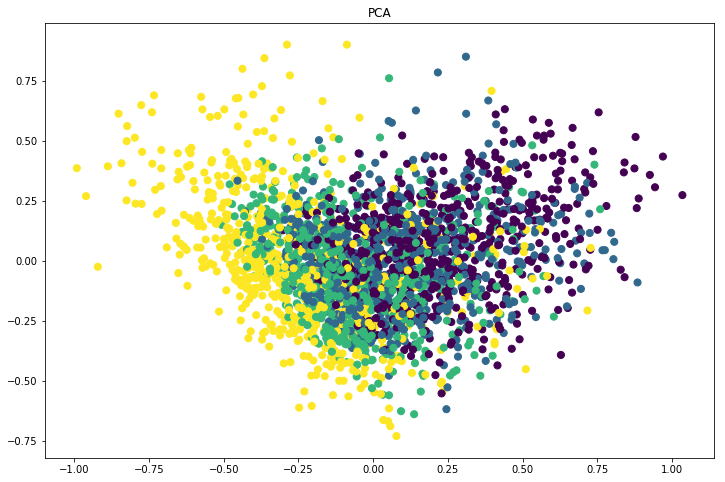

In [64]:
kmeans = KMeans(n_clusters=4, random_state=1)

kmeans.fit(X)

# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y, s=50, cmap='viridis')
# plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

Text(0.5, 1.0, 'PCA')

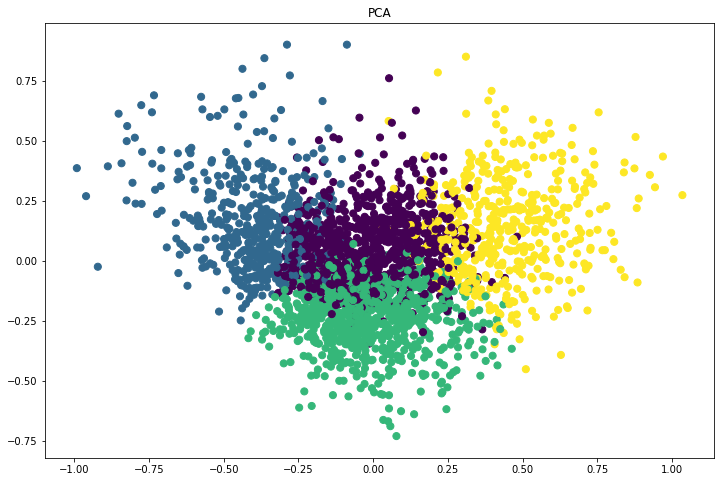

In [65]:
kmeans1 = KMeans(n_clusters=4, random_state=1)

kmeans1.fit(normalized_data)

# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(normalized_data)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans1.labels_, s=50, cmap='viridis')
# plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [66]:
for i in np.unique(kmeans.labels_):
    print('Класс', i, 'Число значений', X[y  == i].count()[0])

Класс 0 Число значений 649
Класс 1 Число значений 649
Класс 2 Число значений 648
Класс 3 Число значений 649


In [67]:
y = pd.DataFrame()
y['label'] = kmeans.labels_

In [68]:
for i in np.unique(kmeans.labels_):
    print('Кластр', i)
    print('Число наблюдений', X[y['label'] == i].count()[0])
    print('Относительная частота', X[y['label'] == i].count()[0] / X.count()[0])
    print('Средне', np.mean(X[y['label'] == i]).mean())
    print('Медиана', np.median(X[y['label'] == i]))
    print('Min', X[y['label'] == i].min().min())
    print('Max', X[y['label'] == i].max().max())
    print('Std', X[y['label'] == i].std().std())

Кластр 0
Число наблюдений 899
Относительная частота 0.3464354527938343
Средне 0.22411797270824257
Медиана 0.16666803588193302
Min 0.0
Max 1.0
Std 0.036505423400177386
Кластр 1
Число наблюдений 455
Относительная частота 0.17533718689788053
Средне 0.2801304777766969
Медиана 0.22057761038235124
Min 0.0
Max 1.0
Std 0.05258071860463873
Кластр 2
Число наблюдений 768
Относительная частота 0.29595375722543354
Средне 0.24261314187764224
Медиана 0.17886516524405777
Min 0.0
Max 1.0
Std 0.03721746145259269
Кластр 3
Число наблюдений 473
Относительная частота 0.18227360308285165
Средне 0.24818559201497536
Медиана 0.18078884945541202
Min 0.0
Max 1.0
Std 0.05213036069304135


In [69]:
pd.DataFrame(kmeans.cluster_centers_.T, columns=np.unique(kmeans.labels_), index=X.columns)

,0,1,2,3
k1,0.133809,0.375893,0.125456,0.094173
k2,0.031857,0.230307,0.033551,0.016560
k4,0.808017,0.927886,0.768080,0.727716
k5,0.221482,0.122075,0.466811,0.384243
k6,0.242443,0.173712,0.150186,0.430935
k7,0.117082,0.039801,0.083515,0.559778
k9,0.135630,0.235954,0.060735,0.078469
k10,0.084473,0.146518,0.244143,0.134870
k11,0.274290,0.288713,0.305569,0.257234
k12,0.239952,0.265201,0.281584,0.219375


## 6. ДИСКРИМИНАНТНЫЙ АНАЛИЗ ДАННЫХ

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [72]:
auc_sum = {}
for i in y['label'].unique():
    print('Класс', i)
    pred = clf.predict(X[y['label'] == i])
    auc_sum[str(i)] = accuracy_score(y[y['label'] == i], pred)
#     print('""% правильных ответов:',auc_sum[str(i)])
    unique, counts = np.unique(pred, return_counts=True)
    percent = [round(i / counts.sum(), 2) * 100 for i in counts]
    print('класс, предсказанная принадлежность, % принадлежности:')
    print(np.asarray((unique, counts, percent)).T)
    print('Число всех наблюдений', X[y['label'] == i].count()[0])
    print()

Класс 0
класс, предсказанная принадлежность, % принадлежности:
[[  0. 868.  97.]
 [  1.   2.   0.]
 [  2.  17.   2.]
 [  3.  12.   1.]]
Число всех наблюдений 899

Класс 3
класс, предсказанная принадлежность, % принадлежности:
[[  0.  14.   3.]
 [  2.  18.   4.]
 [  3. 441.  93.]]
Число всех наблюдений 473

Класс 1
класс, предсказанная принадлежность, % принадлежности:
[[  0.  80.  18.]
 [  1. 368.  81.]
 [  2.   7.   2.]]
Число всех наблюдений 455

Класс 2
класс, предсказанная принадлежность, % принадлежности:
[[  0.  44.   6.]
 [  1.   2.   0.]
 [  2. 717.  93.]
 [  3.   5.   1.]]
Число всех наблюдений 768



In [73]:
np.mean([i[1] for i in auc_sum.items()])

0.9100622308037292

Согласно этой информации 91% исходных наблюдений классифицированы верно. Наиболее высокая точность достигнута при классификации предприятий, относящихся к 0 классу платежеспособности (97%), наименьшая
– предприятий из 1 класса.

Ниже приведены коэффициенты классифицирующих функций d_i , i = 0, .... , 1 , использующихся для предсказания класса, которому принадлежит новое наблюдения. Правило классификации следующее: наблюдение принадлежит классу кредитоспособности i , для классифицирующей функции которого d i получено наибольшее значение.

In [74]:
print('Коэффициенты классифицирующих функций')
pd.DataFrame(clf.coef_.T, columns=['d1', 'd2', 'd3', 'd4'], index=X.columns)

Коэффициенты классифицирующих функций


,d1,d2,d3,d4
k1,-2.942328,13.232544,-1.237594,-5.127237
k2,-2.696594,9.924873,-2.640764,-0.134191
k4,0.154174,2.557568,-0.813723,-1.432044
k5,-6.843468,-5.405294,9.252652,3.183191
k6,0.499978,-1.550597,-2.844518,5.159896
k7,-4.394328,-7.852225,-5.231156,24.399134
k9,-2.541137,1.347262,4.989525,-4.567605
k10,-0.883867,-1.869104,3.285679,-1.857003
k11,-0.552953,-1.329029,1.861797,-0.693547
k12,-0.810342,0.356696,1.908427,-1.901630


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [76]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [77]:
y_pred = clf.predict(X_test)

In [78]:
for i in y['label'].unique():
    good = 0
    bad = 0
    print('Класс', i)
    for j, value in enumerate(y_test.values):
        if value[0] == i and y_pred[j] == i:
            good += 1
        elif value[0] == i:
            bad += 1
    print('Число верных ответов:', good, '\nЧисло неверных ответов:', bad, '\nПроцент неверных ответов:', round(bad / (bad + good), 2) * 100)
    

Класс 0
Число верных ответов: 71 
Число неверных ответов: 2 
Процент неверных ответов: 3.0
Класс 3
Число верных ответов: 47 
Число неверных ответов: 6 
Процент неверных ответов: 11.0
Класс 1
Число верных ответов: 30 
Число неверных ответов: 10 
Процент неверных ответов: 25.0
Класс 2
Число верных ответов: 85 
Число неверных ответов: 9 
Процент неверных ответов: 10.0


In [79]:
accuracy_score(y_test, y_pred)

0.8961538461538462

In [80]:
print('Коэффициенты классифицирующих функций')
pd.DataFrame(clf.coef_.T, columns=['d1', 'd2', 'd3', 'd4'], index=X.columns)

Коэффициенты классифицирующих функций


,d1,d2,d3,d4
k1,-2.986416,13.015225,-0.901936,-5.539605
k2,-2.576420,9.474284,-2.759550,0.133885
k4,0.052346,2.571184,-0.964157,-1.096280
k5,-6.587263,-4.945749,9.344471,2.846171
k6,0.472077,-1.710770,-2.804226,5.262101
k7,-4.469480,-7.639253,-5.315512,24.868419
k9,-2.574687,2.419262,5.010839,-5.368113
k10,-0.898834,-1.538351,3.247862,-1.924301
k11,-0.610784,-1.438334,1.662447,-0.045412
k12,-0.796480,0.907168,1.945508,-2.452034


## 7. КЛАССИФИКАЦИЯ НА ОСНОВЕ ЛОГИТ-МОДЕЛИ МНОЖЕСТВЕННОГО ВЫБОРА

В моделях множественного выбора нужно принять одно решение, но выбрать между тремя и более вариантами. 

Другие названия для логистической регрессии, используемые в различных прикладных областях, включают логистическую модель, Логит-модель, и классификатор максимальной энтропии.

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
for index, i in enumerate(reg.coef_.T):
    print('k' + str(index), i.sum())

k0 -0.8721917051025541
k1 -2.3456407935049963
k2 -1.45000218244822
k3 -2.433462505988855
k4 -0.2627306499204858
k5 -2.6580118853049424
k6 -5.598481260776652
k7 -1.5656105012614734
k8 -0.7261311124780319
k9 -0.6925778153416091
k10 2.3212796547948416
k11 -1.1632139665204488
k12 -1.315377049691064
k13 -5.0810034171475
k14 0.3971489213067368
k15 0.19176812940846877
k16 -0.18411242225187863


In [84]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=n_clusters, init_params='kmeans')
model.fit(X)
print(model.aic(X))

-114563.6748382941


In [85]:
y_pred = reg.predict(X_test)

In [86]:
for i in np.unique(y_pred):
    good = 0
    bad = 0
    print('Класс', i)
    for j, value in enumerate(y_test.values):
        if value[0] == i and y_pred[j] == i:
            good += 1
        elif value[0] == i:
            bad += 1
    print('Число верных ответов:', good, '\nЧисло неверных ответов:', bad, '\nПроцент неверных ответов:', round(bad / (bad + good), 2) * 100)
    

Класс 0
Число верных ответов: 71 
Число неверных ответов: 2 
Процент неверных ответов: 3.0
Класс 1
Число верных ответов: 35 
Число неверных ответов: 5 
Процент неверных ответов: 12.0
Класс 2
Число верных ответов: 90 
Число неверных ответов: 4 
Процент неверных ответов: 4.0
Класс 3
Число верных ответов: 49 
Число неверных ответов: 4 
Процент неверных ответов: 8.0


Наилучшая точность достигнута на классификации 0-го класса, наихудшая - на 1-м классе.

In [87]:
accuracy_score(y_test, y_pred)

0.9423076923076923